# ELAIS-N1 Luminosity Function

Use the depth maps to get a histogram of areas with a given depth.

In [1]:
from herschelhelp_internal import git_version
print("This notebook was run with herschelhelp_internal version: \n{}".format(git_version()))
import datetime
print("This notebook was executed on: \n{}".format(datetime.datetime.now()))

This notebook was run with herschelhelp_internal version: 
0246c5d (Thu Jan 25 17:01:47 2018 +0000) [with local modifications]
This notebook was executed on: 
2018-03-27 16:38:39.116452


In [2]:
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))

import os
import time

from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.table import Column, Table, join
import numpy as np
from pymoc import MOC
import healpy as hp
#import pandas as pd #Astropy has group_by function so apandas isn't required.
import seaborn as sns

import warnings
#We ignore warnings - this is a little dangerous but a huge number of warnings are generated by empty cells later
warnings.filterwarnings('ignore')

from herschelhelp_internal.utils import inMoc, coords_to_hpidx, flux_to_mag, mag_to_flux
from herschelhelp_internal.masterlist import find_last_ml_suffix, nb_ccplots

from astropy.io.votable import parse_single_table

In [3]:
os.environ['GAMA_DATA'] = 'We are not using GAMA data'
from luminosity_function.gal_sample import CosmoLookup

In [4]:
FIELD = 'ELAIS-N1'
FILTERS_DIR = "/opt/herschelhelp_python/database_builder/filters/"
DMU_DIR = '/Users/rs548/GitHub/dmu_products/'

In [5]:
depths = Table.read("{}dmu1/dmu1_ml_ELAIS-N1/data/depths_elais-n1_20180216.fits".format(DMU_DIR))
final_cat = Table.read("{}dmu32/dmu32_ELAIS-N1/data/ELAIS-N1_20171016.fits".format(DMU_DIR))

## I - Histogram of areas


In [6]:
depths = depths["hp_idx_O_13", 
                "hp_idx_O_10", 
                "ferr_ap_irac_i1_mean", 
                "f_ap_irac_i1_p90", 
                "ferr_irac_i1_mean", 
                "f_irac_i1_p90"]

(0, 5.0)

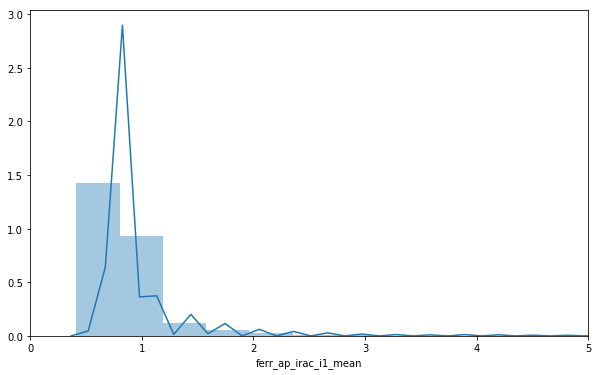

In [7]:
depth_hist_plot = sns.distplot(depths["ferr_ap_irac_i1_mean"][~np.isnan(depths["ferr_ap_irac_i1_mean"])])
depth_hist_plot.set_xlim(0,5.)

In [17]:
bins = np.linspace(0.,2.,1000)
depth_histogram = np.histogram(depths["ferr_ap_irac_i1_mean"][~np.isnan(depths["ferr_ap_irac_i1_mean"])], bins)

In [18]:
np.max(depths["ferr_ap_irac_i1_mean"][~np.isnan(depths["ferr_ap_irac_i1_mean"])])

19.785714285714285

In [19]:
depth_histogram[1][:-1]

array([ 0.        ,  0.002002  ,  0.004004  ,  0.00600601,  0.00800801,
        0.01001001,  0.01201201,  0.01401401,  0.01601602,  0.01801802,
        0.02002002,  0.02202202,  0.02402402,  0.02602603,  0.02802803,
        0.03003003,  0.03203203,  0.03403403,  0.03603604,  0.03803804,
        0.04004004,  0.04204204,  0.04404404,  0.04604605,  0.04804805,
        0.05005005,  0.05205205,  0.05405405,  0.05605606,  0.05805806,
        0.06006006,  0.06206206,  0.06406406,  0.06606607,  0.06806807,
        0.07007007,  0.07207207,  0.07407407,  0.07607608,  0.07807808,
        0.08008008,  0.08208208,  0.08408408,  0.08608609,  0.08808809,
        0.09009009,  0.09209209,  0.09409409,  0.0960961 ,  0.0980981 ,
        0.1001001 ,  0.1021021 ,  0.1041041 ,  0.10610611,  0.10810811,
        0.11011011,  0.11211211,  0.11411411,  0.11611612,  0.11811812,
        0.12012012,  0.12212212,  0.12412412,  0.12612613,  0.12812813,
        0.13013013,  0.13213213,  0.13413413,  0.13613614,  0.13

[<matplotlib.text.Text at 0x12eba3c18>, <matplotlib.text.Text at 0x12eb9e438>]

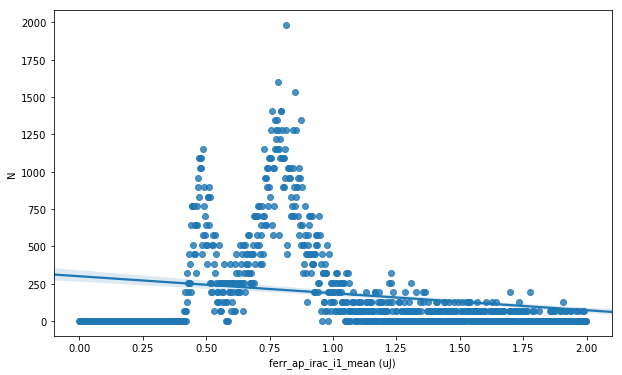

In [20]:
ax = sns.regplot(depth_histogram[1][:-1], depth_histogram[0])
ax.set(xlabel='ferr_ap_irac_i1_mean (uJ)', ylabel='N')

## II - zmax for a given object

Write function which takes an object of a given flux and computes the maximum z for which it is brighter than 5 sigma in every bin of the depth histogram.

At this stage before we include the fitted SED we are attempting a very simple approach assuming a flat SED.

In [12]:
m_test, merr_test = 23., 0.1
redshift_test = 2.
f_test, ferr_test = mag_to_flux(m_test, merr_test)


In [13]:
cosmo = CosmoLookup()

In [14]:
def L(f, ferr, z):
    """Return Luminosity for an object with a given flux at a given redshift
    Assuming a flat SED"""
    
    
    
    

In [15]:
def z_max(L, L_err, ferr_mean):
    """Returns the maximum redshift the object can be detected"""
    

In [16]:
z_max = 

SyntaxError: invalid syntax (<ipython-input-16-580ee793f489>, line 1)